In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
# export LD_LIBRARY_PATH="$LD_LIBRARY_PATH:/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64"
# export CUDA_HOME=/usr/local/cuda
# import tensorflow as tf

/home/ck2886/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
file = r'Data/DataPrepared.csv'
df_stocks = pd.read_csv(file)

In [3]:
df_stocks

,close,Open,articles,MACD,Stochastics,ATR
0,81.430000,56.885002,. The Marais. Looking Back at World Events. Vo...,-0.172858,37.748228,0.750000
1,81.468001,56.911545,. Win-a-Trip!. Lessons From Saddam. Evaluating...,-0.191408,30.399980,0.900000
2,81.506001,56.938089,. Warm Memories of Gerald Ford on a Chilly Day...,-0.213207,32.300010,1.050000
3,81.544002,56.964632,. Estimates of Iraqi Civilian Deaths. Romania ...,-0.238937,34.200040,1.200000
4,81.582002,56.991176,". For Dodd, Wall Street Looms Large. Ford's Lo...",-0.269420,36.100070,1.350000
5,81.620003,57.017719,". Ethics Changes Proposed for House Trips, K S...",-0.305652,38.000100,1.500000
6,81.910004,57.220310,. I Feel Bad About My Face. Bush Recycles the ...,-0.348833,52.500150,1.900002
7,80.860001,56.486801,. Macworld Bingo. Anti-Surge Protests Against ...,-0.426067,0.000000,1.229995
8,81.023333,56.600902,. In da Car at Dakar. The Macworld-C.E.S. Conf...,-0.412226,0.000000,1.346664
9,81.186666,56.715004,. BitTorrent Comes to the Television. LG&#8217...,-0.394078,1.568336,1.463333


In [4]:
df_stocks['prices'] = df_stocks['close'].apply(np.int64)

In [5]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles', 'MACD', 'Stochastics', 'ATR', 'Open']]

In [6]:
df_stocks

,prices,articles,MACD,Stochastics,ATR,Open
0,81,. The Marais. Looking Back at World Events. Vo...,-0.172858,37.748228,0.750000,56.885002
1,81,. Win-a-Trip!. Lessons From Saddam. Evaluating...,-0.191408,30.399980,0.900000,56.911545
2,81,. Warm Memories of Gerald Ford on a Chilly Day...,-0.213207,32.300010,1.050000,56.938089
3,81,. Estimates of Iraqi Civilian Deaths. Romania ...,-0.238937,34.200040,1.200000,56.964632
4,81,". For Dodd, Wall Street Looms Large. Ford's Lo...",-0.269420,36.100070,1.350000,56.991176
5,81,". Ethics Changes Proposed for House Trips, K S...",-0.305652,38.000100,1.500000,57.017719
6,81,. I Feel Bad About My Face. Bush Recycles the ...,-0.348833,52.500150,1.900002,57.220310
7,80,. Macworld Bingo. Anti-Surge Protests Against ...,-0.426067,0.000000,1.229995,56.486801
8,81,. In da Car at Dakar. The Macworld-C.E.S. Conf...,-0.412226,0.000000,1.346664,56.600902
9,81,. BitTorrent Comes to the Television. LG&#8217...,-0.394078,1.568336,1.463333,56.715004


In [7]:

df = df_stocks[['prices','MACD', 'Stochastics', 'ATR', 'Open']].copy()
df

,prices,MACD,Stochastics,ATR,Open
0,81,-0.172858,37.748228,0.750000,56.885002
1,81,-0.191408,30.399980,0.900000,56.911545
2,81,-0.213207,32.300010,1.050000,56.938089
3,81,-0.238937,34.200040,1.200000,56.964632
4,81,-0.269420,36.100070,1.350000,56.991176
5,81,-0.305652,38.000100,1.500000,57.017719
6,81,-0.348833,52.500150,1.900002,57.220310
7,80,-0.426067,0.000000,1.229995,56.486801
8,81,-0.412226,0.000000,1.346664,56.600902
9,81,-0.394078,1.568336,1.463333,56.715004


In [8]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [9]:
df

,prices,MACD,Stochastics,ATR,Open,compound,neg,neu,pos
0,81,-0.172858,37.748228,0.750000,56.885002,,,,
1,81,-0.191408,30.399980,0.900000,56.911545,,,,
2,81,-0.213207,32.300010,1.050000,56.938089,,,,
3,81,-0.238937,34.200040,1.200000,56.964632,,,,
4,81,-0.269420,36.100070,1.350000,56.991176,,,,
5,81,-0.305652,38.000100,1.500000,57.017719,,,,
6,81,-0.348833,52.500150,1.900002,57.220310,,,,
7,80,-0.426067,0.000000,1.229995,56.486801,,,,
8,81,-0.412226,0.000000,1.346664,56.600902,,,,
9,81,-0.394078,1.568336,1.463333,56.715004,,,,


In [10]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles'])
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print (df_stocks.loc[date, 'articles'])
        print (date)

In [12]:
df

,prices,MACD,Stochastics,ATR,Open,compound,neg,neu,pos
0,81,-0.172858,37.748228,0.750000,56.885002,-0.997,0.111,0.803,0.085
1,81,-0.191408,30.399980,0.900000,56.911545,-0.9992,0.161,0.754,0.085
2,81,-0.213207,32.300010,1.050000,56.938089,0.9988,0.093,0.787,0.121
3,81,-0.238937,34.200040,1.200000,56.964632,-0.9881,0.176,0.723,0.102
4,81,-0.269420,36.100070,1.350000,56.991176,-0.9871,0.132,0.775,0.093
5,81,-0.305652,38.000100,1.500000,57.017719,-0.9995,0.2,0.748,0.051
6,81,-0.348833,52.500150,1.900002,57.220310,-0.9975,0.112,0.835,0.053
7,80,-0.426067,0.000000,1.229995,56.486801,-0.9882,0.118,0.8,0.082
8,81,-0.412226,0.000000,1.346664,56.600902,-0.9668,0.124,0.785,0.091
9,81,-0.394078,1.568336,1.463333,56.715004,-0.9957,0.162,0.772,0.066


In [13]:
datasetNorm = (df - df.mean()) / (df.max() - df.min())
dataset = df
dataset.head(2)

,prices,MACD,Stochastics,ATR,Open,compound,neg,neu,pos
0,81,-0.172858,37.748228,0.75,56.885002,-0.997,0.111,0.803,0.085
1,81,-0.191408,30.399980,0.90,56.911545,-0.9992,0.161,0.754,0.085


In [14]:
num_epochs = 10000

batch_size = 1

total_series_length = len(dataset.index)

truncated_backprop_length = 3 #The size of the sequence

state_size = 12 #The number of neurons

num_features = 4
num_classes = 1 #[1,0]

num_batches = total_series_length//batch_size//truncated_backprop_length

min_test_size = 100

print('The total series length is: %d' %total_series_length)
print('The current configuration gives us %d batches of %d observations each one looking %d steps in the past' 
      %(num_batches,batch_size,truncated_backprop_length))

The total series length is: 3642
The current configuration gives us 1214 batches of 1 observations each one looking 3 steps in the past


In [15]:
datasetTrain = datasetNorm[dataset.index < num_batches*batch_size*truncated_backprop_length]


for i in range(min_test_size,len(datasetNorm.index)):
    
    if(i % truncated_backprop_length*batch_size == 0):
        test_first_idx = len(datasetNorm.index)-i
        break

datasetTest =  datasetNorm[dataset.index >= test_first_idx]

In [16]:
datasetTrain.head(2)

,prices,MACD,Stochastics,ATR,Open,compound,neg,neu,pos
0,0.614401,-0.046253,-0.113071,-0.029811,0.516340,-0.0680756,-0.154567,0.143266,-0.0303239
1,0.614401,-0.051216,-0.186554,-0.020039,0.516826,-0.0691763,0.0966888,-0.0600532,-0.0303239


In [17]:
datasetTest.head(2)

,prices,MACD,Stochastics,ATR,Open,compound,neg,neu,pos
3540,0.001901,0.054767,0.253036,-0.038281,0.047507,-0.0673751,0.00121144,0.122519,-0.195929
3541,-0.010599,0.052078,-0.323886,-0.034372,0.039485,-0.0639729,0.0213119,-0.118144,0.15439


In [18]:
# Save pandas frame in csv form
datasetTrain.to_csv('Data/datasetTrain.csv',
                       sep=',', encoding='utf-8',index = False)
datasetTest.to_csv('Data/datasetTest.csv',
                       sep=',', encoding='utf-8', index = False)

print("Saved successfully")

Saved successfully


In [19]:
xTrain = datasetTrain[['Open','MACD','Stochastics','ATR', 'pos', 'neg', 'compound', 'neu']].as_matrix()
yTrain = datasetTrain['prices'].as_matrix()

In [20]:
print(xTrain[0:1],'\n',yTrain[0:1])

[[0.5163403304147484 -0.046252939600900794 -0.11307113869578231
  -0.02981144927868251 -0.03032385789288174 -0.15456745561966873
  -0.06807556432823622 0.14326631894836783]] 
 [ 0.61440143]


In [21]:
xTest = datasetTest[['Open','MACD','Stochastics','ATR', 'pos', 'neg', 'compound', 'neu']].as_matrix()
yTest = datasetTest['prices'].as_matrix()

In [22]:
print(xTest[0:1],'\n',yTest[0:1])

[[0.04750679797351973 0.05476734497197641 0.2530360275566836
  -0.03828057035158965 -0.19592895343428307 0.0012114388526930035
  -0.06737510903229388 0.12251943098156284]] 
 [ 0.00190143]


In [29]:
yTrain[0]

0.6144014277869303

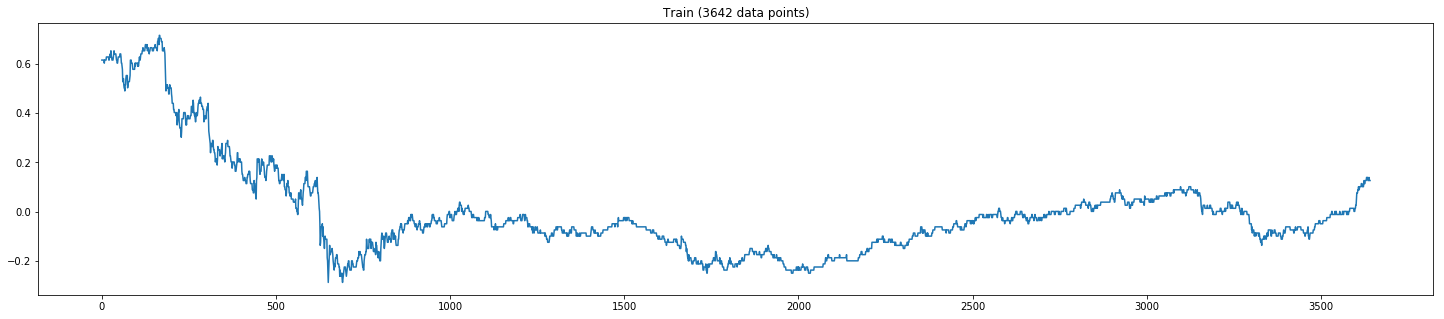

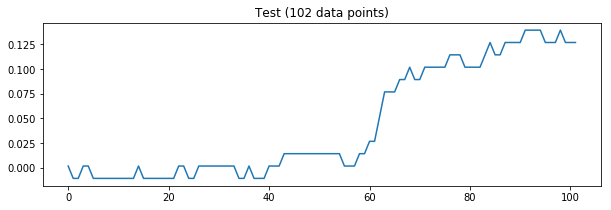

In [33]:
#Normalized Closing price
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,5))
plt.plot(yTrain)
plt.title('Train (' +str(len(xTrain))+' data points)')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(yTest)
plt.title('Test (' +str(len(xTest))+' data points)')
plt.show()

In [40]:
df['prices']

0       81
1       81
2       81
3       81
4       81
5       81
6       81
7       80
8       81
9       81
10      81
11      81
12      81
13      82
14      82
15      82
16      82
17      82
18      82
19      82
20      81
21      81
22      82
23      82
24      83
25      82
26      84
27      82
28      82
29      81
        ..
3612    40
3613    40
3614    40
3615    40
3616    41
3617    41
3618    41
3619    40
3620    40
3621    40
3622    40
3623    41
3624    42
3625    41
3626    41
3627    42
3628    42
3629    42
3630    42
3631    43
3632    43
3633    43
3634    43
3635    42
3636    42
3637    42
3638    43
3639    42
3640    42
3641    42
Name: prices, Length: 3642, dtype: int64

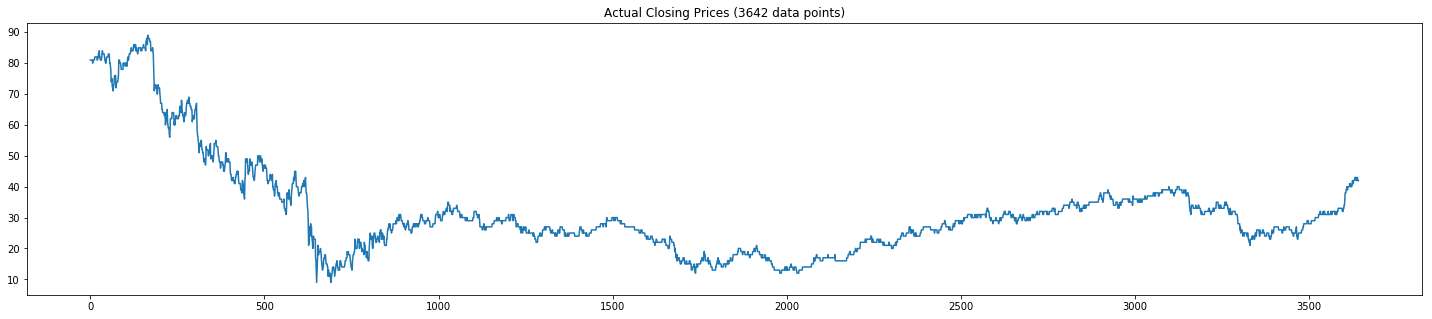

In [43]:
#Actual Closing price
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,5))
plt.plot(df['prices'])
plt.title('Actual Closing Prices (' +str(len(xTrain))+' data points)')
plt.show()
# plt.figure(figsize=(10,3))
# plt.plot(yTest)
# plt.title('Test (' +str(len(xTest))+' data points)')
# plt.show()

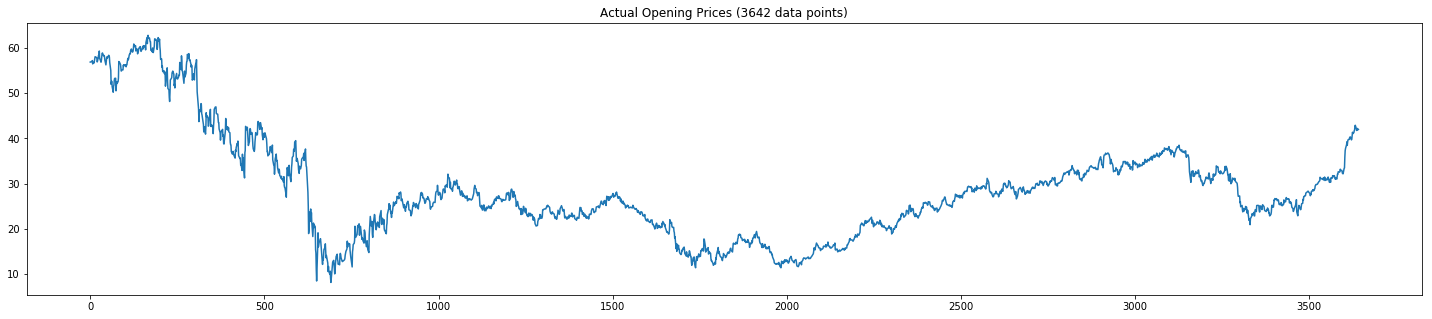

In [45]:
#Actual Open price
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,5))
plt.plot(df['Open'])
plt.title('Actual Opening Prices (' +str(len(xTrain))+' data points)')
plt.show()